In [8]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
!pip install yfinance
# importing all required libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


download data of a security from yahoo finance 

In [23]:
import yfinance as yf
gld = pdr.get_data_yahoo('GLD')
# gld.head()
day=np.arange(1, len(gld)+1)#new column day is added
gld['day']=day
gld.drop(columns=['Adj Close','Volume'],inplace= True)
gld=gld[['day','Open','High','Low','Close']]
gld.head()

[*********************100%***********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
Return evenly spaced values within a given interval.

In [24]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4598 entries, 2004-11-18 to 2023-02-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4598 non-null   int64  
 1   Open    4598 non-null   float64
 2   High    4598 non-null   float64
 3   Low     4598 non-null   float64
 4   Close   4598 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 215.5 KB


In [28]:
gld['9-day']=gld['Close'].rolling(9).mean().shift()
gld['21-day']=gld['Close'].rolling(21).mean().shift()
gld[20:25]

<ipython-input-28-437bb0867e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['9-day']=gld['Close'].rolling(9).mean().shift()
<ipython-input-28-437bb0867e3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['21-day']=gld['Close'].rolling(21).mean().shift()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,44.071111,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428


strategy is to look at 9 day average(fast) and 21 day average. whenever fast moves above slow buy and vice versa

signal column is added when to long and short


In [29]:
gld['signal']=np.where(gld['9-day']>gld['21-day'],1,0)
gld['signal']=np.where(gld['9-day']<gld['21-day'],-1,gld['signal'])
gld.dropna(inplace=True)#Remove all rows wit NULL values from the DataFrame.
gld.head()

<ipython-input-29-63d925f44ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal']=np.where(gld['9-day']>gld['21-day'],1,0)
<ipython-input-29-63d925f44ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal']=np.where(gld['9-day']<gld['21-day'],-1,gld['signal'])
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1


In [32]:
gld['return']=np.log(gld['Close']).diff()
gld['system_return']=gld['signal']*gld['return']
gld['entry']=gld.signal.diff()
gld.head()

<ipython-input-32-32fd3d6d7044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['return']=np.log(gld['Close']).diff()
<ipython-input-32-32fd3d6d7044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['system_return']=gld['signal']*gld['return']
<ipython-input-32-32fd3d6d7044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1,NaN,NaN,NaN
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1,-0.002710,0.002710,0.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1,-0.004533,0.004533,0.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1,0.005663,-0.005663,0.0
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1,0.004732,-0.004732,0.0


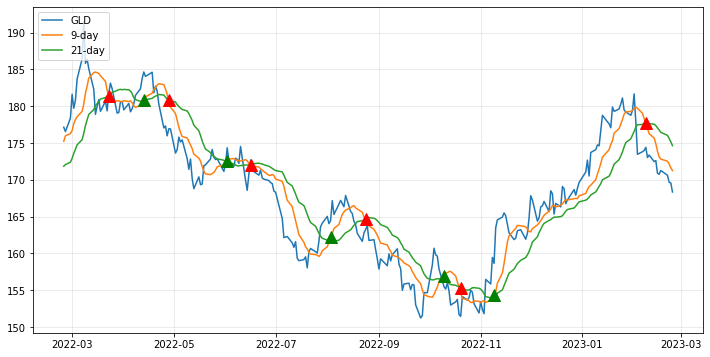

In [37]:
plt.rcParams['figure.figsize']=12,6
plt.grid(True,alpha=.3)
plt.plot(gld.iloc[-252:]['Close'],label= 'GLD')
plt.plot(gld.iloc[-252:]['9-day'],label='9-day')
plt.plot(gld.iloc[-252:]['21-day'],label='21-day')
plt.plot(gld[-252:].loc[gld.entry ==2].index, gld[-252:]['9-day'][gld.entry==2],'^',color='g', markersize =12)
plt.plot(gld[-252:].loc[gld.entry ==-2].index, gld[-252:]['21-day'][gld.entry==-2],'^',color='r', markersize =12)
plt.legend(loc=2)

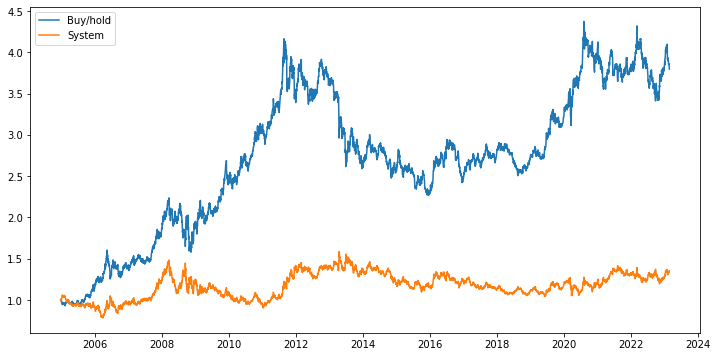

In [44]:

plt.plot(np.exp(gld['return']).cumprod(),label='Buy/hold')
plt.plot(np.exp(gld.system_return).cumprod(),label='System')
plt.legend(loc=2)

In [45]:
np.exp(gld['return']).cumprod()-1

Date
2004-12-20         NaN
2004-12-21   -0.002706
2004-12-22   -0.007217
2004-12-23   -0.001579
2004-12-27    0.003157
                ...   
2023-02-17    2.862427
2023-02-21    2.847993
2023-02-22    2.826342
2023-02-23    2.824312
2023-02-24    2.796572
Name: return, Length: 4577, dtype: float64

In [48]:
np.exp(gld['system_return']).cumprod()

Date
2004-12-20         NaN
2004-12-21    1.002714
2004-12-22    1.007269
2004-12-23    1.001581
2004-12-27    0.996853
                ...   
2023-02-17    1.331607
2023-02-21    1.336602
2023-02-22    1.344165
2023-02-23    1.344878
2023-02-24    1.354705
Name: system_return, Length: 4577, dtype: float64